C:\Users\user\AppData\Local\Temp\ipykernel_27400\3413084017.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('../data/raw/churn_data.csv', parse_dates=['last_service_date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        10000 non-null  object        
 1   name               10000 non-null  object        
 2   age                10000 non-null  int64         
 3   car_brand          10000 non-null  object        
 4   location           10000 non-null  object        
 5   last_service_date  10000 non-null  datetime64[ns]
 6   visits_last_year   10000 non-null  int64         
 7   monthly_spend_inr  10000 non-null  float64       
 8   churn              10000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 703.3+ KB


Text(0.5, 1.0, 'Days Since Last Service')

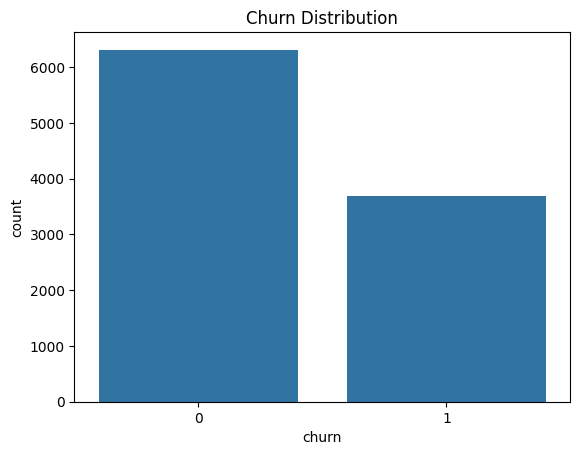

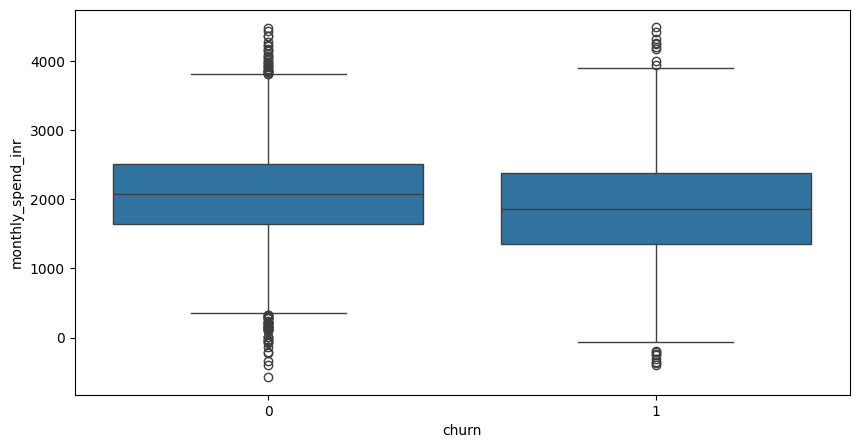

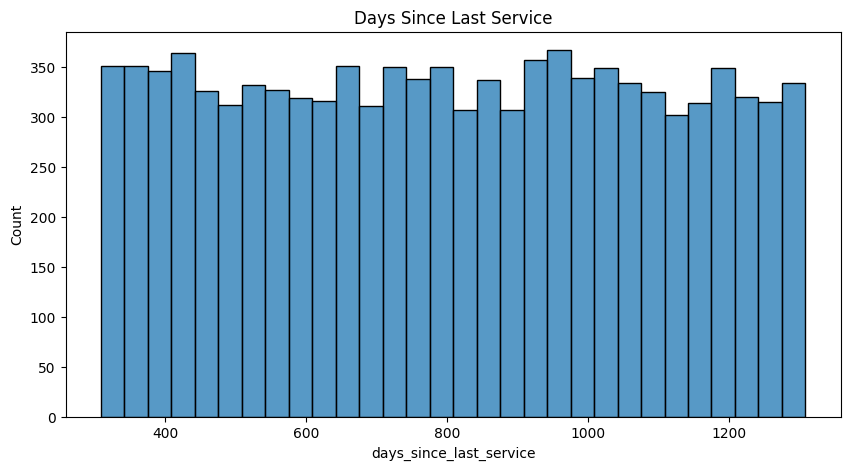

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/raw/churn_data.csv', parse_dates=['last_service_date'], dayfirst=True)

# Initial checks
df.info()
df.describe()
df.head()

# Missing values
df.isnull().sum()

# Convert target to category if not already
df['churn'] = df['churn'].astype('category')

# Feature engineering
df['days_since_last_service'] = (pd.to_datetime('2025-08-01') - df['last_service_date']).dt.days

# Visuals
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")

plt.figure(figsize=(10,5))
sns.boxplot(x='churn', y='monthly_spend_inr', data=df)

plt.figure(figsize=(10,5))
sns.histplot(df['days_since_last_service'], bins=30)
plt.title("Days Since Last Service")
